# Assignment 7: Xarray Fundamentals with Atmospheric Radiation Data

In this assignment, we will use Xarray to analyze top-of-atmosphere radiation data from [NASA's CERES project](https://ceres.larc.nasa.gov/).

<img src="https://upload.wikimedia.org/wikipedia/commons/b/bb/The-NASA-Earth%27s-Energy-Budget-Poster-Radiant-Energy-System-satellite-infrared-radiation-fluxes.jpg" width=65%>

_Public domain, by NASA, from Wikimedia Commons_


A pre-downloaded and subsetted a portion of the CERES dataset is available here: http://ldeo.columbia.edu/~rpa/CERES_EBAF-TOA_Edition4.0_200003-201701.condensed.nc. The size of the data file is 702.53 MB. It may take a few minutes to download.

Please review the CERES [FAQs](https://ceres.larc.nasa.gov/resources/faqs) before getting started.

Start by importing Numpy, Matplotlib, and Xarray. Set the default figure size to (12, 6).

In [45]:
import numpy as np
import xarray as xr
from matplotlib import pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (12,6)

Next, download the NetCDF file using wget.

In [46]:
! wget http://ldeo.columbia.edu/~rpa/CERES_EBAF-TOA_Edition4.0_200003-201701.condensed.nc
! gunzip CERES_EBAF-TOA_Edition4.0_200003-201701.condendes.nc

--2020-10-26 16:00:01--  http://ldeo.columbia.edu/~rpa/CERES_EBAF-TOA_Edition4.0_200003-201701.condensed.nc
Resolving ldeo.columbia.edu (ldeo.columbia.edu)... 129.236.19.40
Connecting to ldeo.columbia.edu (ldeo.columbia.edu)|129.236.19.40|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://www.ldeo.columbia.edu/~rpa/CERES_EBAF-TOA_Edition4.0_200003-201701.condensed.nc [following]
--2020-10-26 16:00:01--  https://www.ldeo.columbia.edu/~rpa/CERES_EBAF-TOA_Edition4.0_200003-201701.condensed.nc
Resolving www.ldeo.columbia.edu (www.ldeo.columbia.edu)... 129.236.14.15
Connecting to www.ldeo.columbia.edu (www.ldeo.columbia.edu)|129.236.14.15|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 736656452 (703M) [application/x-netcdf]
Saving to: ‘CERES_EBAF-TOA_Edition4.0_200003-201701.condensed.nc.2’

CERES_EBAF-TOA_Edit 100%[===================>] 702.53M  93.5MB/s    in 7.9s    

2020-10-26 16:00:09 (89.4 MB/s) - ‘CERES_EBAF-TOA_Edition4.

## 1.1) Open the dataset and display its contents 


In [47]:
ds=xr.open_dataset('CERES_EBAF-TOA_Edition4.0_200003-201701.condensed.nc')
ds

<xarray.Dataset>
Dimensions:                      (lat: 180, lon: 360, time: 203)
Coordinates:
  * lon                          (lon) float32 0.5 1.5 2.5 ... 357.5 358.5 359.5
  * time                         (time) datetime64[ns] 2000-03-15 ... 2017-01-15
  * lat                          (lat) float32 -89.5 -88.5 -87.5 ... 88.5 89.5
Data variables:
    toa_sw_all_mon               (time, lat, lon) float32 ...
    toa_lw_all_mon               (time, lat, lon) float32 ...
    toa_net_all_mon              (time, lat, lon) float32 ...
    toa_sw_clr_mon               (time, lat, lon) float32 ...
    toa_lw_clr_mon               (time, lat, lon) float32 ...
    toa_net_clr_mon              (time, lat, lon) float32 ...
    toa_cre_sw_mon               (time, lat, lon) float32 ...
    toa_cre_lw_mon               (time, lat, lon) float32 ...
    toa_cre_net_mon              (time, lat, lon) float32 ...
    solar_mon                    (time, lat, lon) float32 ...
    cldarea_total_daynight_mon   (time, lat, lon) float32 ...
    cldpress_total_daynight_mon  (time, lat, lon) float32 ...
    cldtemp_total_daynight_mon   (time, lat, lon) float32 ...
    cldtau_total_day_mon         (time, lat, lon) float32 ...
Attributes:
    title:             CERES EBAF (Energy Balanced and Filled) TOA Fluxes. Mo...
    institution:       NASA/LaRC (Langley Research Center) Hampton, Va
    Conventions:       CF-1.4
    comment:           Data is from East to West and South to North.
    Version:           Edition 4.0; Release Date March 7, 2017
    Fill_Value:        Fill Value is -999.0
    DOI:               10.5067/TERRA+AQUA/CERES/EBAF-TOA_L3B.004.0
    Production_Files:  List of files used in creating the present Master netC...

## 1.2) Print out the `long_name` attribute of each variable
Print `variable`: `long name` for each variable. Format the output so that the start of the `long name` attributes are aligned. 

In [48]:
ds.keys()

KeysView(<xarray.Dataset>
Dimensions:                      (lat: 180, lon: 360, time: 203)
Coordinates:
  * lon                          (lon) float32 0.5 1.5 2.5 ... 357.5 358.5 359.5
  * time                         (time) datetime64[ns] 2000-03-15 ... 2017-01-15
  * lat                          (lat) float32 -89.5 -88.5 -87.5 ... 88.5 89.5
Data variables:
    toa_sw_all_mon               (time, lat, lon) float32 ...
    toa_lw_all_mon               (time, lat, lon) float32 ...
    toa_net_all_mon              (time, lat, lon) float32 ...
    toa_sw_clr_mon               (time, lat, lon) float32 ...
    toa_lw_clr_mon               (time, lat, lon) float32 ...
    toa_net_clr_mon              (time, lat, lon) float32 ...
    toa_cre_sw_mon               (time, lat, lon) float32 ...
    toa_cre_lw_mon               (time, lat, lon) float32 ...
    toa_cre_net_mon              (time, lat, lon) float32 ...
    solar_mon                    (time, lat, lon) float32 ...
    cldarea_total_d

In [49]:
for i in ds:
    print('%30s: %s' % (ds[i].name, ds[i].long_name))

                toa_sw_all_mon: Top of The Atmosphere Shortwave Flux, Monthly Means, All-Sky conditions
                toa_lw_all_mon: Top of The Atmosphere Longwave Flux, Monthly Means, All-Sky conditions
               toa_net_all_mon: Top of The Atmosphere Net Flux, Monthly Means, All-Sky conditions
                toa_sw_clr_mon: Top of The Atmosphere Shortwave Flux, Monthly Means, Clear-Sky conditions
                toa_lw_clr_mon: Top of The Atmosphere Longwave Flux, Monthly Means, Clear-Sky conditions
               toa_net_clr_mon: Top of The Atmosphere Net Flux, Monthly Means, Clear-Sky conditions
                toa_cre_sw_mon: Top of The Atmosphere Cloud Radiative Effects Shortwave Flux, Monthly Means
                toa_cre_lw_mon: Top of The Atmosphere Cloud Radiative Effects Longwave Flux, Monthly Means
               toa_cre_net_mon: Top of The Atmosphere Cloud Radiative Effects Net Flux, Monthly Means
                     solar_mon: Incoming Solar Flux, Monthly Means


## 2.1) Calculate the time-mean of the entire dataset

In [50]:
tmean = ds.mean(dim='time')
tmean

<xarray.Dataset>
Dimensions:                      (lat: 180, lon: 360)
Coordinates:
  * lon                          (lon) float32 0.5 1.5 2.5 ... 357.5 358.5 359.5
  * lat                          (lat) float32 -89.5 -88.5 -87.5 ... 88.5 89.5
Data variables:
    toa_sw_all_mon               (lat, lon) float32 122.27177 ... 104.44447
    toa_lw_all_mon               (lat, lon) float32 141.0882 ... 194.10733
    toa_net_all_mon              (lat, lon) float32 -91.287636 ... -126.26464
    toa_sw_clr_mon               (lat, lon) float32 119.93927 ... 89.46622
    toa_lw_clr_mon               (lat, lon) float32 140.16454 ... 200.43248
    toa_net_clr_mon              (lat, lon) float32 -88.03184 ... -117.617226
    toa_cre_sw_mon               (lat, lon) float32 -2.3314087 ... -14.978885
    toa_cre_lw_mon               (lat, lon) float32 -0.92165476 ... 6.3279757
    toa_cre_net_mon              (lat, lon) float32 -3.2528844 ... -8.650782
    solar_mon                    (lat, lon) float32 172.07214 ... 172.28741
    cldarea_total_daynight_mon   (lat, lon) float32 51.52265 ... 78.93002
    cldpress_total_daynight_mon  (lat, lon) float32 486.54102 ... 766.89557
    cldtemp_total_daynight_mon   (lat, lon) float32 225.22205 ... 247.93153
    cldtau_total_day_mon         (lat, lon) float32 4.157735 ... 4.821138

## 2.2) From this, make a 2D plot of the the time-mean TOA longwave, shortwave, and solar radiation
(All-Sky conditions)

Note the sign conventions on each variable.

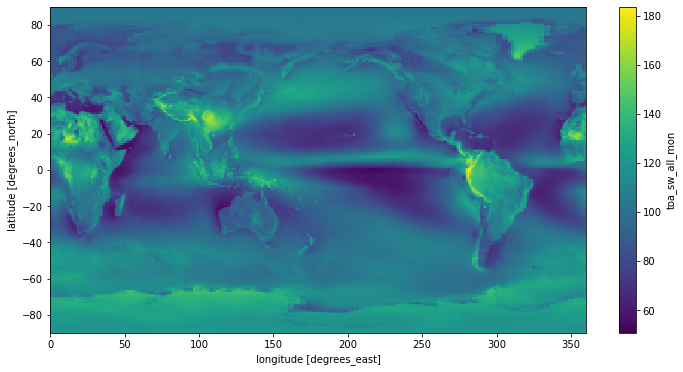

In [51]:
sw = tmean.toa_sw_all_mon.plot();

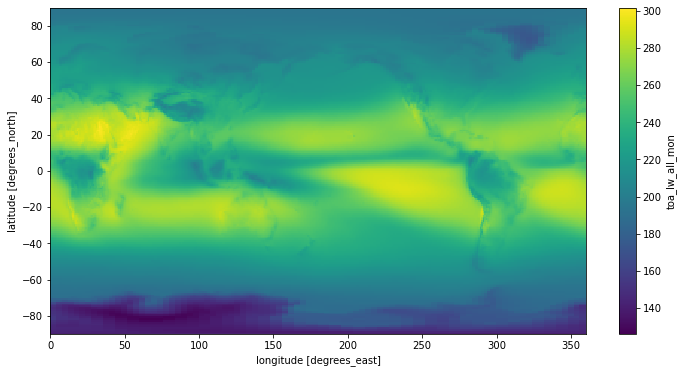

In [52]:
lw = tmean.toa_lw_all_mon.plot();

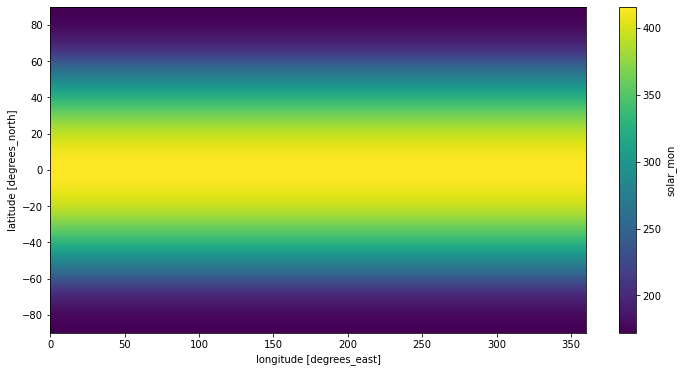

In [53]:
solar = tmean.solar_mon.plot();

## 2.3) Add up the three variables above and verify (visually) that they are equivalent to the TOA net flux

You have to pay attention to and think carefully about the sign conventions for each variable in order to get this to work.

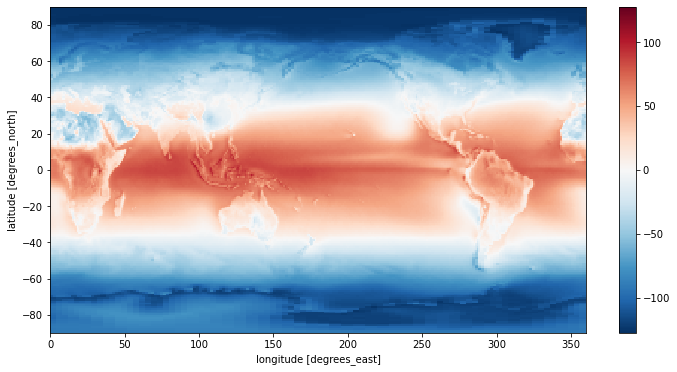

In [54]:
nettoa = -tmean.toa_sw_all_mon-tmean.toa_lw_all_mon+tmean.solar_mon
nettoa.plot()

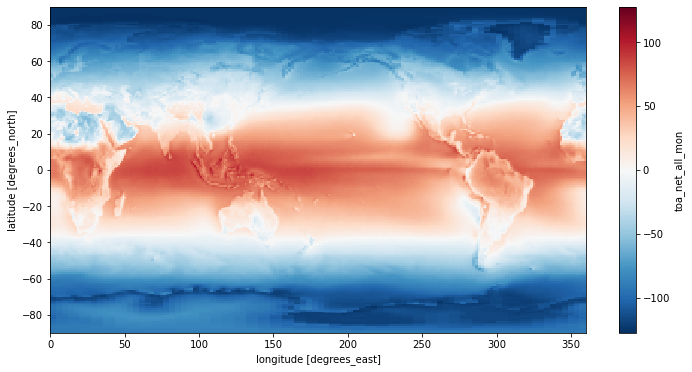

In [55]:
tmean.toa_net_all_mon.plot()

## 3.1) Calculate the global mean of TOA net radiation directly from the dataset

Since the Earth is approximately in radiative balance, the net TOA radiation should be zero. But taking the naive mean from this dataset, you should find a number far from zero. Why?

In [56]:
ds.toa_net_all_mon.mean()

<xarray.DataArray 'toa_net_all_mon' ()>
array(-28.729034, dtype=float32)

The answer is that each "pixel" or "grid point" of this dataset does not represent an equal area of Earth's surface. So naively taking the mean, i.e. giving equal weight to each point, gives the wrong answer.

On a lat / lon grid, the relative area of each grid point is proportional to $\cos(\lambda)$. ($\lambda$ is latitude)

## 3.2) Create a `weight` array proportional to $\cos(\lambda)$ with a mean value of 1

Verify its mean is 1 and plot it. Be careful about radians vs. degrees.

In [57]:
lam = np.deg2rad(ds.lat)
lam
#check this

<xarray.DataArray 'lat' (lat: 180)>
array([-1.5620697 , -1.5446163 , -1.527163  , -1.5097098 , -1.4922565 ,
       -1.4748032 , -1.4573499 , -1.4398966 , -1.4224433 , -1.4049901 ,
       -1.3875368 , -1.3700835 , -1.3526301 , -1.3351768 , -1.3177236 ,
       -1.3002703 , -1.282817  , -1.2653637 , -1.2479104 , -1.2304571 ,
       -1.2130039 , -1.1955506 , -1.1780972 , -1.1606439 , -1.1431906 ,
       -1.1257373 , -1.1082841 , -1.0908308 , -1.0733775 , -1.0559242 ,
       -1.0384709 , -1.0210176 , -1.0035644 , -0.98611104, -0.96865773,
       -0.9512044 , -0.93375117, -0.91629785, -0.89884454, -0.8813913 ,
       -0.863938  , -0.84648466, -0.8290314 , -0.8115781 , -0.7941248 ,
       -0.7766715 , -0.7592182 , -0.7417649 , -0.72431165, -0.70685834,
       -0.689405  , -0.6719518 , -0.65449846, -0.63704515, -0.6195919 ,
       -0.6021386 , -0.58468527, -0.567232  , -0.5497787 , -0.53232545,
       -0.51487213, -0.49741882, -0.47996554, -0.46251225, -0.44505894,
       -0.42760566, -0.41015238, -0.3926991 , -0.37524578, -0.3577925 ,
       -0.3403392 , -0.3228859 , -0.30543262, -0.28797933, -0.27052602,
       -0.25307274, -0.23561944, -0.21816616, -0.20071286, -0.18325958,
       -0.16580628, -0.14835298, -0.1308997 , -0.1134464 , -0.09599311,
       -0.07853982, -0.06108652, -0.04363323, -0.02617994, -0.00872665,
        0.00872665,  0.02617994,  0.04363323,  0.06108652,  0.07853982,
        0.09599311,  0.1134464 ,  0.1308997 ,  0.14835298,  0.16580628,
        0.18325958,  0.20071286,  0.21816616,  0.23561944,  0.25307274,
        0.27052602,  0.28797933,  0.30543262,  0.3228859 ,  0.3403392 ,
        0.3577925 ,  0.37524578,  0.3926991 ,  0.41015238,  0.42760566,
        0.44505894,  0.46251225,  0.47996554,  0.49741882,  0.51487213,
        0.53232545,  0.5497787 ,  0.567232  ,  0.58468527,  0.6021386 ,
        0.6195919 ,  0.63704515,  0.65449846,  0.6719518 ,  0.689405  ,
        0.70685834,  0.72431165,  0.7417649 ,  0.7592182 ,  0.7766715 ,
        0.7941248 ,  0.8115781 ,  0.8290314 ,  0.84648466,  0.863938  ,
        0.8813913 ,  0.89884454,  0.91629785,  0.93375117,  0.9512044 ,
        0.96865773,  0.98611104,  1.0035644 ,  1.0210176 ,  1.0384709 ,
        1.0559242 ,  1.0733775 ,  1.0908308 ,  1.1082841 ,  1.1257373 ,
        1.1431906 ,  1.1606439 ,  1.1780972 ,  1.1955506 ,  1.2130039 ,
        1.2304571 ,  1.2479104 ,  1.2653637 ,  1.282817  ,  1.3002703 ,
        1.3177236 ,  1.3351768 ,  1.3526301 ,  1.3700835 ,  1.3875368 ,
        1.4049901 ,  1.4224433 ,  1.4398966 ,  1.4573499 ,  1.4748032 ,
        1.4922565 ,  1.5097098 ,  1.527163  ,  1.5446163 ,  1.5620697 ],
      dtype=float32)
Coordinates:
  * lat      (lat) float32 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5

In [58]:
weights=np.cos(lam)/np.cos(lam).mean()
weights

<xarray.DataArray 'lat' (lat: 180)>
array([0.01370748, 0.0411182 , 0.06851641, 0.09589355, 0.12324168,
       0.15055226, 0.17781699, 0.20502755, 0.23217563, 0.25925282,
       0.28625125, 0.31316245, 0.33997828, 0.36669055, 0.39329097,
       0.41977173, 0.4461246 , 0.4723416 , 0.49841473, 0.52433604,
       0.55009747, 0.57569146, 0.60111016, 0.6263457 , 0.65139043,
       0.67623675, 0.70087695, 0.72530377, 0.74950975, 0.7734873 ,
       0.7972293 , 0.8207285 , 0.8439775 , 0.8669696 , 0.88969755,
       0.9121545 , 0.93433356, 0.9562281 , 0.97783136, 0.99913657,
       1.0201377 , 1.040828  , 1.0612011 , 1.081251  , 1.1009717 ,
       1.120357  , 1.1394008 , 1.1580979 , 1.176442  , 1.1944277 ,
       1.2120496 , 1.2293024 , 1.2461807 , 1.2626795 , 1.2787935 ,
       1.294518  , 1.3098482 , 1.3247793 , 1.3393071 , 1.3534267 ,
       1.3671341 , 1.3804252 , 1.3932956 , 1.4057418 , 1.4177597 ,
       1.4293457 , 1.4404963 , 1.4512081 , 1.461478  , 1.4713026 ,
       1.480679  , 1.4896045 , 1.4980761 , 1.5060915 , 1.5136479 ,
       1.5207435 , 1.5273757 , 1.5335428 , 1.5392425 , 1.5444736 ,
       1.5492342 , 1.5535228 , 1.5573382 , 1.5606792 , 1.5635449 ,
       1.5659342 , 1.5678465 , 1.5692813 , 1.5702381 , 1.5707166 ,
       1.5707166 , 1.5702381 , 1.5692813 , 1.5678465 , 1.5659342 ,
       1.5635449 , 1.5606792 , 1.5573382 , 1.5535228 , 1.5492342 ,
       1.5444736 , 1.5392425 , 1.5335428 , 1.5273757 , 1.5207435 ,
       1.5136479 , 1.5060915 , 1.4980761 , 1.4896045 , 1.480679  ,
       1.4713026 , 1.461478  , 1.4512081 , 1.4404963 , 1.4293457 ,
       1.4177597 , 1.4057418 , 1.3932956 , 1.3804252 , 1.3671341 ,
       1.3534267 , 1.3393071 , 1.3247793 , 1.3098482 , 1.294518  ,
       1.2787935 , 1.2626795 , 1.2461807 , 1.2293024 , 1.2120496 ,
       1.1944277 , 1.176442  , 1.1580979 , 1.1394008 , 1.120357  ,
       1.1009717 , 1.081251  , 1.0612011 , 1.040828  , 1.0201377 ,
       0.99913657, 0.97783136, 0.9562281 , 0.93433356, 0.9121545 ,
       0.88969755, 0.8669696 , 0.8439775 , 0.8207285 , 0.7972293 ,
       0.7734873 , 0.74950975, 0.72530377, 0.70087695, 0.67623675,
       0.65139043, 0.6263457 , 0.60111016, 0.57569146, 0.55009747,
       0.52433604, 0.49841473, 0.4723416 , 0.4461246 , 0.41977173,
       0.39329097, 0.36669055, 0.33997828, 0.31316245, 0.28625125,
       0.25925282, 0.23217563, 0.20502755, 0.17781699, 0.15055226,
       0.12324168, 0.09589355, 0.06851641, 0.0411182 , 0.01370748],
      dtype=float32)
Coordinates:
  * lat      (lat) float32 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5

In [59]:
weights.mean()

<xarray.DataArray 'lat' ()>
array(1., dtype=float32)

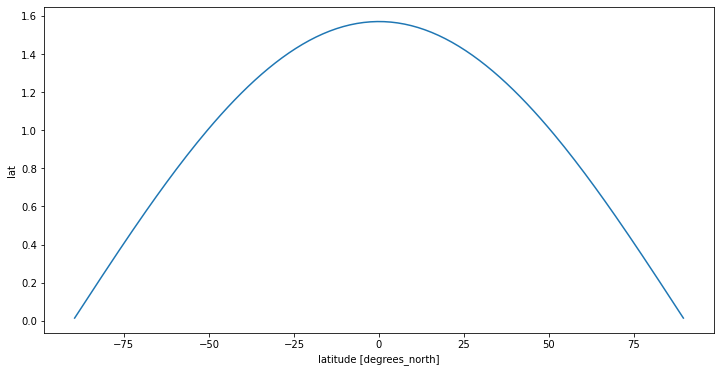

In [60]:
weights.plot();

In [61]:
#conversion to radians then do cosin to calculate the weight
#degrees to radians numpy calc

## 3.3) Redo your global mean TOA net radiation calculation with this weight factor

Remember Xarray's [handling of broadcasting](http://xarray.pydata.org/en/stable/computation.html#broadcasting-by-dimension-name). Don't make this harder than it needs to be.

In [62]:
weightedTOA = ds.toa_net_all_mon * weights
weightedMean = np.mean(weightedTOA)
weightedMean

<xarray.DataArray ()>
array(0.8780887, dtype=float32)

This time around, you should have found something much closer to zero. Ask a climate scientist what the net energy imbalance of Earth due to global warming is estimate to be. Do you think our calculation is precise enough to detect this? 

## 3.4) Now that you have a `weight` factor, verify that the TOA incoming solar, outgoing longwave, and outgoing shortwave approximately match up with infographic shown in the first cell of this assignment

In [63]:
sw = weights*ds.toa_sw_all_mon
lw = weights*ds.toa_lw_all_mon
sol = weights*ds.solar_mon

In [64]:
sw.mean()

<xarray.DataArray ()>
array(99.1391, dtype=float32)

In [65]:
lw.mean()

<xarray.DataArray ()>
array(240.2678, dtype=float32)

In [66]:
sol.mean()

<xarray.DataArray ()>
array(340.28503, dtype=float32)

We can go beyond a weight factor and actually calculate the area of each pixel of the dataset, using the formula

$$ dA = R^2 \cos(\lambda) d\lambda d \varphi $$

where $d\lambda$ and $d\varphi$ are the spacing of the points in latitude and longitude (measured in radians). We can approximate Earth's radius as $R = 6,371$ km.

## 4.1) calculate the pixel area using this formula and create a 2D (lon, lat) DataArray for it

(Xarray's `ones_like` function can help you easily create and broadcast DataArrays.) Verify that the sum of all the pixels equals the Earth's true surface area as evaluated using the formula for the area of a sphere (yes, the Earth is not a sphere ... it's just a homework problem).

In [84]:
R = 6.371e6
dlam=2*np.pi/360
dphi=2*np.pi/360

In [85]:
da = R**2*np.cos(np.radians(ds.lat))*xr.ones_like(ds.lon)*dlam*dphi

In [91]:
area = da.sum()
print('%3.2e' % area)

5.10e+14


In [92]:
areasphere = 4*np.pi*(R**2)
print('%3.2e' % areasphere)

5.10e+14


Multiplying the pixel area from above with the radiative flux gives you the total amount of radiation absorbed in each pixel

## 4.2) Calculate and plot the total amount of net radiation in each 1-degree latitude band

Label with correct units

In [102]:
weightedMean

<xarray.DataArray ()>
array(0.8780887, dtype=float32)

In [103]:
totalnetrad = (da*tmean.toa_net_all_mon).sum(dim='lon')

Text(0, 0.5, 'Wm^(-2)')

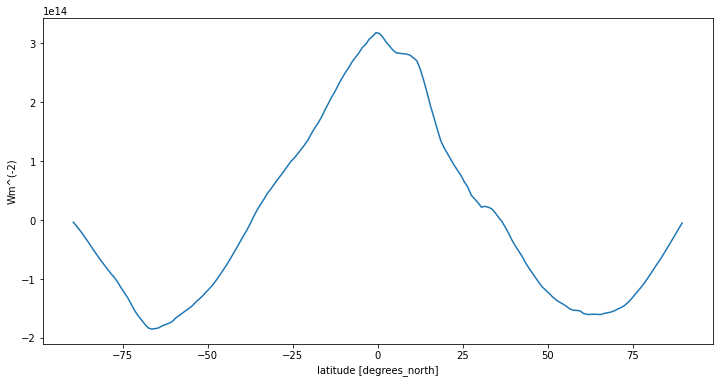

In [136]:
totalnetrad.plot();
plt.ylabel('Wm^(-2)')
#label

## 4.3) Plot the cumulatuve sum in latitude of that quantity

Label with correct units. (Hint: check out xarray's [cumsum](http://xarray.pydata.org/en/stable/generated/xarray.DataArray.cumsum.html) function.)

This curve tells you how much energy must be transported meridionally by the ocean and atmosphere in order to account for the radiative imbalance at the top of the atmosphere.

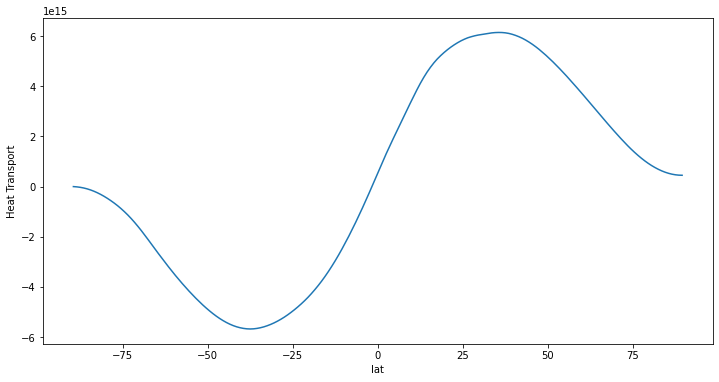

In [139]:
totalnetrad.cumsum(dim='lat').plot()
plt.ylabel('Heat Transport');
plt.xlabel('lat');
#label y and fix x axis 

You should get a curve that looks something like this: http://www.cgd.ucar.edu/cas/papers/jclim2001a/Fig7.html

## 5.1) Plot the time-mean cloud area fraction (day and night)

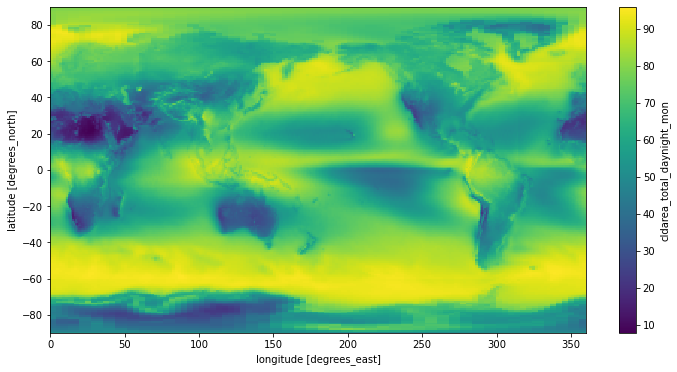

In [110]:
tmean.cldarea_total_daynight_mon.plot()

## 5.2) Define boolean masks for low cloud area ($\le$ 25%) and high cloud area ($\ge$ 75%)

Use the whole dataset, not the time mean.

In [112]:
low = ds.cldarea_total_daynight_mon <= 25
high = ds.cldarea_total_daynight_mon >=75

## 5.3) Calculate and plot composites of time-mean outgoing shortwave and longwave radiation for low and high cloud area regions

Your results should be 2D maps.

Xarray's [where](http://xarray.pydata.org/en/stable/generated/xarray.DataArray.where.html) function will be helpful. This may generate a warning regarding the mean of an empty slice which you can ignore.

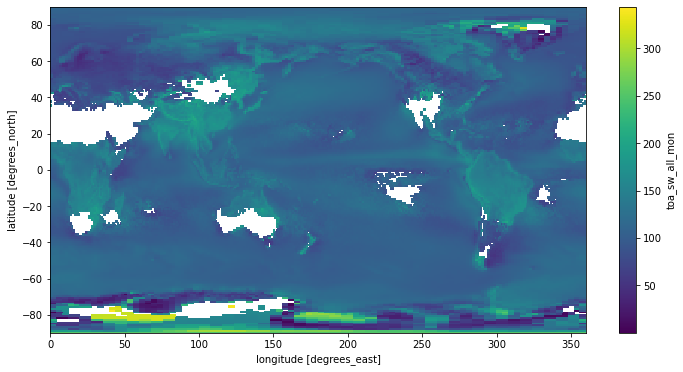

In [121]:
swHighcloud = ds.where(high).mean(dim='time')
swHighcloud.toa_sw_all_mon.plot();

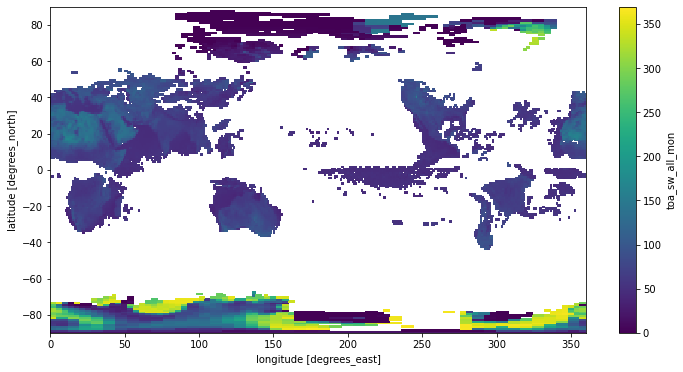

In [124]:
swLowcloud = ds.where(low).mean(dim='time')
swLowcloud.toa_sw_all_mon.plot();

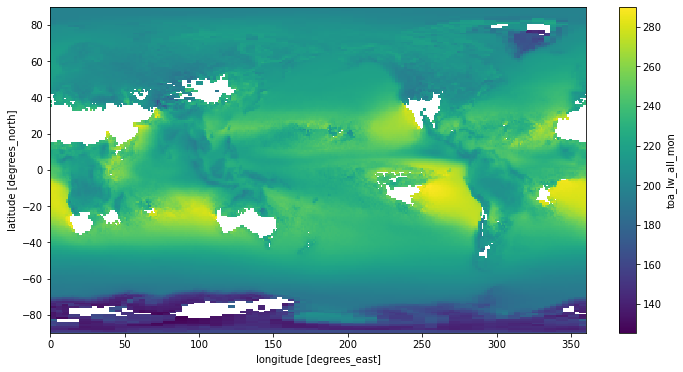

In [122]:
lwHighcloud = ds.where(high).mean(dim='time')
lwHighcloud.toa_lw_all_mon.plot();

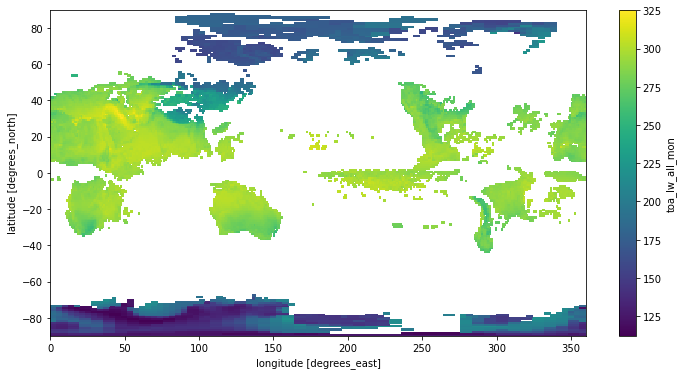

In [123]:
lwLowcloud = ds.where(low).mean(dim='time')
lwLowcloud.toa_lw_all_mon.plot();

## 5.4) Using the `weight` factor from 3.2, calculate the global mean values of shortwave and longwave radiation, composited in high and low cloud regions

In [130]:
swLowcloud*weights

<xarray.Dataset>
Dimensions:                      (lat: 180, lon: 360)
Coordinates:
  * lon                          (lon) float32 0.5 1.5 2.5 ... 357.5 358.5 359.5
  * lat                          (lat) float32 -89.5 -88.5 -87.5 ... 88.5 89.5
Data variables:
    toa_sw_all_mon               (lat, lon) float32 0.2391218 0.2391218 ... nan
    toa_lw_all_mon               (lat, lon) float32 1.7115499 1.7115499 ... nan
    toa_net_all_mon              (lat, lon) float32 -1.638386 -1.638386 ... nan
    toa_sw_clr_mon               (lat, lon) float32 0.3018198 0.3018198 ... nan
    toa_lw_clr_mon               (lat, lon) float32 1.6788232 1.6788232 ... nan
    toa_net_clr_mon              (lat, lon) float32 -1.6683712 ... nan
    toa_cre_sw_mon               (lat, lon) float32 0.06269801 ... nan
    toa_cre_lw_mon               (lat, lon) float32 -0.03275573 ... nan
    toa_cre_net_mon              (lat, lon) float32 0.029949123 ... nan
    solar_mon                    (lat, lon) float32 0.31218776 ... nan
    cldarea_total_daynight_mon   (lat, lon) float32 0.2933694 0.2933694 ... nan
    cldpress_total_daynight_mon  (lat, lon) float32 7.4833922 7.4833922 ... nan
    cldtemp_total_daynight_mon   (lat, lon) float32 3.0628824 3.0628824 ... nan
    cldtau_total_day_mon         (lat, lon) float32 0.09916118 ... nan

In [131]:
swHighcloud*weights

<xarray.Dataset>
Dimensions:                      (lat: 180, lon: 360)
Coordinates:
  * lon                          (lon) float32 0.5 1.5 2.5 ... 357.5 358.5 359.5
  * lat                          (lat) float32 -89.5 -88.5 -87.5 ... 88.5 89.5
Data variables:
    toa_sw_all_mon               (lat, lon) float32 3.4282398 ... 1.5153444
    toa_lw_all_mon               (lat, lon) float32 2.2159848 ... 2.7220306
    toa_net_all_mon              (lat, lon) float32 -0.8487156 ... -1.7219176
    toa_sw_clr_mon               (lat, lon) float32 3.2634935 ... 1.2563094
    toa_lw_clr_mon               (lat, lon) float32 2.2505963 ... 2.8280184
    toa_net_clr_mon              (lat, lon) float32 -0.71860594 ... -1.5689639
    toa_cre_sw_mon               (lat, lon) float32 -0.16479555 ... -0.25903925
    toa_cre_lw_mon               (lat, lon) float32 0.034691654 ... 0.10602769
    toa_cre_net_mon              (lat, lon) float32 -0.13007975 ... -0.15300912
    solar_mon                    (lat, lon) float32 4.795475 ... 2.5154557
    cldarea_total_daynight_mon   (lat, lon) float32 1.122157 ... 1.1812276
    cldpress_total_daynight_mon  (lat, lon) float32 6.3374505 ... 10.547352
    cldtemp_total_daynight_mon   (lat, lon) float32 3.1537898 ... 3.4300222
    cldtau_total_day_mon         (lat, lon) float32 0.040798187 ... 0.072551064

In [132]:
lwLowcloud*weights

<xarray.Dataset>
Dimensions:                      (lat: 180, lon: 360)
Coordinates:
  * lon                          (lon) float32 0.5 1.5 2.5 ... 357.5 358.5 359.5
  * lat                          (lat) float32 -89.5 -88.5 -87.5 ... 88.5 89.5
Data variables:
    toa_sw_all_mon               (lat, lon) float32 0.2391218 0.2391218 ... nan
    toa_lw_all_mon               (lat, lon) float32 1.7115499 1.7115499 ... nan
    toa_net_all_mon              (lat, lon) float32 -1.638386 -1.638386 ... nan
    toa_sw_clr_mon               (lat, lon) float32 0.3018198 0.3018198 ... nan
    toa_lw_clr_mon               (lat, lon) float32 1.6788232 1.6788232 ... nan
    toa_net_clr_mon              (lat, lon) float32 -1.6683712 ... nan
    toa_cre_sw_mon               (lat, lon) float32 0.06269801 ... nan
    toa_cre_lw_mon               (lat, lon) float32 -0.03275573 ... nan
    toa_cre_net_mon              (lat, lon) float32 0.029949123 ... nan
    solar_mon                    (lat, lon) float32 0.31218776 ... nan
    cldarea_total_daynight_mon   (lat, lon) float32 0.2933694 0.2933694 ... nan
    cldpress_total_daynight_mon  (lat, lon) float32 7.4833922 7.4833922 ... nan
    cldtemp_total_daynight_mon   (lat, lon) float32 3.0628824 3.0628824 ... nan
    cldtau_total_day_mon         (lat, lon) float32 0.09916118 ... nan

In [133]:
lwHighcloud*weights

<xarray.Dataset>
Dimensions:                      (lat: 180, lon: 360)
Coordinates:
  * lon                          (lon) float32 0.5 1.5 2.5 ... 357.5 358.5 359.5
  * lat                          (lat) float32 -89.5 -88.5 -87.5 ... 88.5 89.5
Data variables:
    toa_sw_all_mon               (lat, lon) float32 3.4282398 ... 1.5153444
    toa_lw_all_mon               (lat, lon) float32 2.2159848 ... 2.7220306
    toa_net_all_mon              (lat, lon) float32 -0.8487156 ... -1.7219176
    toa_sw_clr_mon               (lat, lon) float32 3.2634935 ... 1.2563094
    toa_lw_clr_mon               (lat, lon) float32 2.2505963 ... 2.8280184
    toa_net_clr_mon              (lat, lon) float32 -0.71860594 ... -1.5689639
    toa_cre_sw_mon               (lat, lon) float32 -0.16479555 ... -0.25903925
    toa_cre_lw_mon               (lat, lon) float32 0.034691654 ... 0.10602769
    toa_cre_net_mon              (lat, lon) float32 -0.13007975 ... -0.15300912
    solar_mon                    (lat, lon) float32 4.795475 ... 2.5154557
    cldarea_total_daynight_mon   (lat, lon) float32 1.122157 ... 1.1812276
    cldpress_total_daynight_mon  (lat, lon) float32 6.3374505 ... 10.547352
    cldtemp_total_daynight_mon   (lat, lon) float32 3.1537898 ... 3.4300222
    cldtau_total_day_mon         (lat, lon) float32 0.040798187 ... 0.072551064

What is the overall effect of clouds on shortwave and longwave radiation?

###### The overall effect of clouds is increased shortwave and longwave toa radiation